<a href="https://colab.research.google.com/github/danwaters/lfi/blob/main/Dan_Waters_CSCE_5218_Final_Project_(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multi-label image classifier for images of musicians**

Based on: https://www.tensorflow.org/tutorials/images/classification 

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Imports**

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras import utils
from keras import preprocessing

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib

In [3]:
# Load the images
data_dir = pathlib.Path('drive/MyDrive/Artists')
data_dir

PosixPath('drive/MyDrive/Artists')

In [4]:
michael_jackson = list(data_dir.glob('michael-jackson/*'))
print(len(michael_jackson))

50


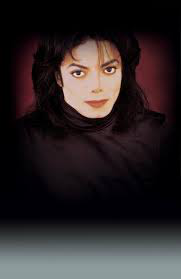

In [5]:
PIL.Image.open(str(michael_jackson[0]))

**Data Preprocessing**

In [9]:
BATCH_SIZE = 10
IMG_HEIGHT = 180
IMG_WIDTH = 180

EPOCHS = 100

train_dataset = preprocessing.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)     


class_names = train_dataset.class_names  
NUM_CLASSES = len(class_names)           

Found 250 files belonging to 4 classes.
Using 200 files for training.


In [10]:
val_dataset = preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

Found 250 files belonging to 4 classes.
Using 50 files for validation.


In [11]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(10, 180, 180, 3)
(10,)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(10).prefetch(buffer_size=AUTOTUNE)

In [13]:
# Normalize
# normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [37]:
# Build the model
print(f'Building a {NUM_CLASSES}-label classifier.')

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(NUM_CLASSES)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()

Building a 4-label classifier.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPoo

In [44]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=200)

Epoch 1/200
20/20 [==============================] - 0s 10ms/step - loss: 2.7817e-06 - accuracy: 1.0000 - val_loss: 7.4214 - val_accuracy: 0.5600
Epoch 2/200
20/20 [==============================] - 0s 10ms/step - loss: 2.6947e-06 - accuracy: 1.0000 - val_loss: 7.4417 - val_accuracy: 0.5600
Epoch 3/200
20/20 [==============================] - 0s 9ms/step - loss: 2.6417e-06 - accuracy: 1.0000 - val_loss: 7.4405 - val_accuracy: 0.5600
Epoch 4/200
20/20 [==============================] - 0s 10ms/step - loss: 2.5505e-06 - accuracy: 1.0000 - val_loss: 7.4454 - val_accuracy: 0.5600
Epoch 5/200
20/20 [==============================] - 0s 10ms/step - loss: 2.5052e-06 - accuracy: 1.0000 - val_loss: 7.4854 - val_accuracy: 0.5600
Epoch 6/200
20/20 [==============================] - 0s 10ms/step - loss: 2.4533e-06 - accuracy: 1.0000 - val_loss: 7.4462 - val_accuracy: 0.5600
Epoch 7/200
20/20 [==============================] - 0s 9ms/step - loss: 2.3514e-06 - accuracy: 1.0000 - val_loss: 7.4691 - v

In [45]:
# Get confusion matrix on the val dataset
y_pred = model.predict(val_dataset)

In [46]:
# Build confusion matrix
predicted_categories = np.argmax(y_pred, axis=1)
actual_categories = tf.concat([y for x, y in val_dataset], axis=0)

print(f'Predicted: {predicted_categories}')
print(f'Actual: {actual_categories}')

Predicted: [2 0 3 3 3 1 3 0 3 3 3 3 3 3 3 3 3 3 3 2 1 3 1 3 3 0 3 3 3 1 0 1 2 3 2 0 3
 1 3 3 1 0 2 2 1 3 0 3 0 3]
Actual: [3 2 1 1 3 0 3 3 3 1 0 1 2 3 2 1 3 2 3 1 2 0 3 3 2 2 2 1 1 1 1 0 2 2 3 3 0
 3 0 3 1 1 2 1 3 1 3 3 3 3]


In [47]:
cm = tf.math.confusion_matrix(actual_categories, predicted_categories, num_classes=4)

In [48]:
# This code is from:
# https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print(cm)

    cm = cm.numpy()
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

tf.Tensor(
[[ 0  2  0  4]
 [ 2  2  2  8]
 [ 2  1  2  6]
 [ 4  3  2 10]], shape=(4, 4), dtype=int32)


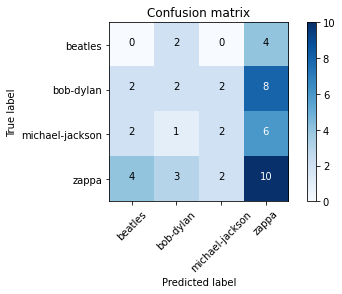

In [49]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion matrix')

plt.show()

In [ ]:
def predict(model, url):
  predict_url = url
  predict_path = tf.keras.utils.get_file('predict', origin=predict_url)
  print(predict_path)

  img = keras.preprocessing.image.load_img(
    predict_path, target_size=(IMG_HEIGHT, IMG_WIDTH)
  )

  img_array = []
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )

  plt.imshow(img)

  

In [ ]:
sample_urls = [
  "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjKvc7_8SLeHlsOrLT6-LpnptoOOLDmCo_kg&usqp=CAU",
  "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCQ6Fk1AbBcRczijclpOKswAm3te5vG7Mfng&usqp=CAU",
  "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTt3tTCLgunkc4BAP4PMsWhUxaGkSxtA6BMFw&usqp=CAU",
  "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcsXPkjxp4FMKniRZKlewCz3OjYrML5sfDJg&usqp=CAU"
]


In [ ]:
# model.save(f'saved_models/classifier')

/root/.keras/datasets/predict
This image most likely belongs to zappa with a 100.00 percent confidence.


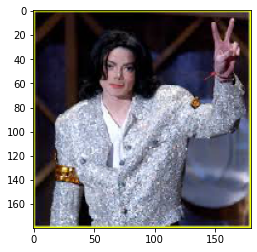

In [ ]:
re_model = keras.models.load_model(f'saved_models/classifier')
predict(re_model, sample_urls[1])